<a href="https://colab.research.google.com/github/muhhanif27/PENGGALIAN-DATA/blob/modul3/codelab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# READ BEFORE CONTINUE

- Untuk mendapatkan akses edit kalian bisa membuat copy di perangkat kalian masing-masing dengan menggunakan akun gmail masing-masing (Menu File -> Save copy in Drive)

# **Modul 3 Penggalian Data**

---
DATA PREPROCESSING

Disusun oleh:
1. Alviya Laela Lestari
2. Kiara Azzahra

Diaudit oleh:
Yufis Azhar, S.Kom, M.Kom

Presented by: TIM LAB-IT Universitas Muhammadiyah Malang

## Tujuan Praktikum

1. Mahasiswa mampu memahami dasar bahasa pemrograman python
2. Mahasiswa mampu memahami tipe-tipe struktur data pada bahasa pemrograman python
3. Mahasiswa mampu memahami list, array, tuple dan dataframe


## Persiapan Software/Apilkasi

**1. Hardware**
- Laptop/Komputer

**2. Software (Pilih salah satu)**
- Visual Studio Code, Google Collaboratory, PyCharm, Jupyter Notebook

**3. Tutorial**
- Menggunakan Google Colab : https://youtu.be/tpDjhSzJor4?si=bFjSP_mf3oB5x520
- Menggunakan Jupyter di VS Code : https://youtu.be/HOg13z1wI1A?si=RhEY2QY5bir-dzEH  
- Menggunakan Jupyter Notebook : https://youtu.be/HQaCF2F_MRo?si=k6ubuGuCg-VS0tQe  
Instal Anaconda : https://youtu.be/XyudQ3B3OWI?si=7qugN_vTxAM30qDt

**4. Dataset:**
- [Dataset Materi](https://drive.google.com/file/d/1LnXfBT5h9J2yoZ7Anq-WhYDrJkfpQhrq/view?usp=drive_link)


## Import Data dan Simple EDA

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/MODUL PENGGALIAN DATA/Dataset /Modul 3/Fruit Prices 2020.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.5193,per pound,0.90,0.2425,pounds,0.4094
1,"Apples, applesauce",Canned,1.0660,per pound,1.00,0.5401,pounds,0.5758
2,"Apples, ready-to-drink",Juice,0.7804,per pint,1.00,8.0000,fluid ounces,0.3902
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.00,8.0000,fluid ounces,0.2926
4,Apricots,Fresh,2.9665,per pound,0.93,0.3638,pounds,1.1603


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fruit               62 non-null     object 
 1   Form                62 non-null     object 
 2   RetailPrice         62 non-null     float64
 3   RetailPriceUnit     62 non-null     object 
 4   Yield               62 non-null     float64
 5   CupEquivalentSize   62 non-null     float64
 6   CupEquivalentUnit   62 non-null     object 
 7   CupEquivalentPrice  62 non-null     float64
dtypes: float64(4), object(4)
memory usage: 4.0+ KB


In [ ]:
df.describe()

,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
count,62.000000,62.000000,62.000000,62.000000
mean,2.616050,0.876129,1.704984,0.919740
std,2.068129,0.174979,2.949262,0.491960
min,0.360400,0.460000,0.123200,0.229200
25%,1.155850,0.722500,0.322450,0.579300
50%,1.868400,0.980000,0.363800,0.895250
75%,3.525600,1.000000,0.540100,1.150475
max,10.552700,1.000000,8.000000,3.070000


In [ ]:
df.isnull().sum()

,0
Fruit,0
Form,0
RetailPrice,0
RetailPriceUnit,0
Yield,0
CupEquivalentSize,0
CupEquivalentUnit,0
CupEquivalentPrice,0


---

Dalam analisis data dan machine learning, data preprocessing adalah langkah krusial yang bertujuan untuk mempersiapkan data mentah agar siap digunakan oleh algoritma atau model. Data mentah biasanya mengandung missing values, inconsistent formats, atau fitur kategorikal, yang harus ditangani sebelum analisis dilakukan. Dengan preprocessing yang tepat, kinerja model machine learning dapat meningkat secara signifikan.

# **1. Handling Categorical Value**

Dalam modul sebelumnya, kalian sudah mempelajari bagaimana cara handling missing value. Di modul 3 ini, selain memahami pentingnya menangani fitur kategorikal, kita juga akan mendalami beberapa teknik populer untuk melakukannya. Fitur kategorikal adalah jenis data yang berupa kategori atau label, seperti warna, kota, atau tingkat kepuasan. Algoritma machine learning tidak dapat bekerja dengan data ini tanpa konversi ke bentuk numerik.

## **1.1 Label Encoding**

Dalam project machine learning, kita akan sering berurusan dengan dataset yang memiliki kolom kategori yang berbeda-beda, di mana beberapa kolom memiliki elemen dalam bentuk variabel ordinal. **Misalnya, kita memiliki kolom tingkat pendapatan dengan elemen “rendah”, “sedang”, dan “tinggi”. Dalam kasus ini, kita dapat mengganti elemen-elemen ini dengan 1, 2, 3,  di mana 1 mewakili “rendah”, 2 mewakili “sedang”, dan 3 mewakili “tinggi”.**

In [ ]:
# Melihat  nilai unik dalam kolom "form"

unique_values = df['Form'].unique()
print(unique_values)

['Fresh' 'Canned' 'Juice' 'Dried' 'Frozen']


Melalui label encoding, kita dapat mengubah kategori menjadi angka secara unik tanpa mempertimbangkan hubungan ordinal.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Data kategorikal
data = df

# Inisialisasi encoder
encoder = LabelEncoder()
df['Form_encoded'] = encoder.fit_transform(df['Form'])

print(df[['Form', 'Form_encoded']])

      Form  Form_encoded
0    Fresh             2
1   Canned             0
2    Juice             4
3    Juice             4
4    Fresh             2
..     ...           ...
57   Fresh             2
58  Frozen             3
59   Fresh             2
60  Frozen             3
61   Fresh             2

[62 rows x 2 columns]


In [ ]:
print(df[['Form', 'Form_encoded']].drop_duplicates())

     Form  Form_encoded
0   Fresh             2
1  Canned             0
2   Juice             4
7   Dried             1
9  Frozen             3


## **1.2 One-Hot Encoding**

One Hot Encoding adalah sebuah metode untuk mengubah variabel kategoris menjadi format biner. Metode ini membuat kolom biner baru (0 dan 1) untuk setiap kategori dalam variabel asli. Misalnya, kita memiliki dataset yang salah satu kolomnya adalah jenis kelamin dengan elemen kategoris “Pria” dan “Wanita”. Label ini tidak memiliki urutan preferensi tertentu seperti label encoding. Selain itu, label ini berupa string, sehingga model machine learning salah menafsirkan bahwa ada semacam hierarki di dalamnya. Untuk mengatasi masalah tersebut, kita bisa menggunakan teknik OHE (One Hot Encoding).

Untuk memahami konsep encoding ini dengan lebih baik, mari kita bahas contoh dari dataframe yang digunakan sebelumnya.

| Form |                                                                                                                                    |
|-----|--------------|
Canned
Dried
Fresh
Frozen
Juice

- Jika form/bentuk buah adalah Fresh, maka kolom Fresh akan memiliki nilai 1, sedangkan kolom form buah lain akan bernilai 0.

- Pola ini memastikan bahwa setiap nilai kategori mendapatkan kolomnya sendiri, yang direpresentasikan dengan nilai biner (0 atau 1).

Output setelah one hot encoding:

|Fruit | Form_Canned | Form_Dried | Form_Fresh | Form_Frozen | Form_Juice |
|-----|-----|-----|-----|-----|-----|
| Apples | 1.0 | 0.0 | 0.0 | 0.0 | 0.0 |
| Apricots | 0.0 | 1.0 | 0.0 | 0.0 | 0.0 |
|Raspberries | 0.0 | 0.0 | 1.0 | 0.0 | 0.0 |
| Strawberries | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| Watermelon | 0.0 | 0.0 | 0.0 | 0.0 | 1.0 |


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi encoder
encoder = OneHotEncoder(sparse_output=False)

# Melakukan OneHotEncoding pada kolom 'Form'
onehot_encoded = encoder.fit_transform(df[['Form']])

# Membuat DataFrame hasil encoding
one_hot_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(['Form']))

# Ambil kolom 'Fruit' dari DataFrame asli
df_fruit = df[['Fruit']]

# Gabungkan kolom 'Fruit' dengan hasil encoding
df_encoded = pd.concat([df_fruit, one_hot_df], axis=1)

print("Encoded data: ")
df_encoded.drop_duplicates()

Encoded data: 


,Fruit,Form_Canned,Form_Dried,Form_Fresh,Form_Frozen,Form_Juice
0,Apples,0.0,0.0,1.0,0.0,0.0
1,"Apples, applesauce",1.0,0.0,0.0,0.0,0.0
2,"Apples, ready-to-drink",0.0,0.0,0.0,0.0,1.0
3,"Apples, frozen concentrate",0.0,0.0,0.0,0.0,1.0
4,Apricots,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
57,Raspberries,0.0,0.0,1.0,0.0,0.0
58,Raspberries,0.0,0.0,0.0,1.0,0.0
59,Strawberries,0.0,0.0,1.0,0.0,0.0
60,Strawberries,0.0,0.0,0.0,1.0,0.0


## **1.3 Ordinal Encoding**

Ordinal encoding mirip dengan Label Encoding, tetapi memungkinkan penentuan urutan kategori secara manual. Teknik ini digunakan jika data memiliki hierarki atau urutan tertentu. Ordinal encoding adalah teknik yang digunakan untuk mengubah data kategorik menjadi nilai numerik yang mempertahankan urutan inherennya. Metode ini bekerja dengan memetakan setiap nilai kategori unik ke bilangan bulat yang berbeda. Biasanya, bilangan bulat dimulai dari 0 dan bertambah 1 untuk tiap kategori tambahan.

Misal, kita memiliki kolom tingkat kematangan buah dengan elemen “Mentah”, “Setengah Masak”, “Masak”, dan “Busuk”. Elemen tersebut akan dipetakan menjadi [0, 1, 2, 3]. Hubungan ordinal dipertahankan (“Mentah” < “Setengah Masak” < “Masak” < “Busuk”).

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Data kategorikal dengan urutan tertentu
data = np.array(['Mentah', 'Setengah Masak', 'Masak', 'Busuk', 'Masak', 'Setengah Masak']).reshape(-1, 1)

# Inisialisasi encoder
encoder = OrdinalEncoder(categories=[['Mentah', 'Setengah Masak', 'Masak', 'Busuk']])
ordinal_data = encoder.fit_transform(data)

print("Original Data:")
print(data.flatten())
print("Ordinal Encoded Data:")
print(ordinal_data)

Original Data:
['Mentah' 'Setengah Masak' 'Masak' 'Busuk' 'Masak' 'Setengah Masak']
Ordinal Encoded Data:
[[0.]
 [1.]
 [2.]
 [3.]
 [2.]
 [1.]]


## **1.4 Binning**

Data binning atau bisa disebut bucketing adalah metode data preprocessing yang digunakan untuk meminimalkan efek kesalahan observasi kecil. Nilai data asli dibagi menjadi interval kecil yang dikenal sebagai bin, kemudian diganti dengan nilai umum yang dihitung untuk bin tersebut. Hal ini membantu menyederhanakan analisis data dan menangani outlier dengan mengelompokkan nilai data ke dalam "bin" tertentu. Dalam binning, data kontinu dapat diubah menjadi data kategorik untuk mengungkap pola atau tren yang lebih jelas.

In [ ]:
import pandas as pd
import numpy as np

# Data numerik
data = [22, 45, 70, 80, 99, 120, 180, 170, 125]
bins = [0, 50, 100, 150, 200]
labels = ['Low', 'Medium', 'High', 'Very High']

# Binning dengan pandas
binned_data = pd.cut(data, bins=bins, labels=labels)

print("Original Data:", data)
print("Binned Data:")
print(binned_data)

Original Data: [22, 45, 70, 80, 99, 120, 180, 170, 125]
Binned Data:
['Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Very High', 'Very High', 'High']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


Keterangan:

a. Dalam kode di atas, kita memiliki data list yang berisi angka acak.

b. Bins menentukan batas bawah dan batas atas untuk setiap kelompok. Rentang yang dibuat adalah:
- 0–50: Low
- 50–100: Medium
- 100–150: High
- 150–200: Very High

c. Labels menentukan nama kategori yang sesuai dengan masing-masing interval.


**Perbedaan dari semua metode handling categorical value:**

| Fitur | Label Encoding | One-Hot Encoding | Ordinal Encoding | Binning |
|---|---|---|---|---|
| Input Data | Kategorikal | Kategorikal | Kategorikal |Numerikal |
| Hasil Output | Angka unik	| Vektor biner | Angka dengan urutan | Kategori baru|
| Urutan Diperhatikan | Tidak | Tidak | Ya | Tidak |
| Cocok untuk Nominal | Ya | Ya | Tidak | Tidak |
| Cocok untuk Ordinal | Ya | Tidak | Ya | Tidak |





# **2. Data Normalization**

Normalisasi (normalization) merupakan metode data preprocessing, mapping, dan scaling yang membantu peramalan dan prediksi model lebih akurat. Normalisasi menjadi sangat penting dalam menyelaraskan berbagai teknik prediksi dan peramalan yang berbeda dengan meningkatkan konsistensi dan komparabilitas berbagai model prediktif dengan menstandarisasi rentang variabel atau fitur independen dalam satu dataset, yang menghasilkan hasil yang lebih stabil dan dapat diandalkan.

**Secara sederhana, normalisasi data adalah praktik mengatur entri data untuk memastikan data tersebut tampak serupa di semua bidang dan catatan, sehingga informasi lebih mudah ditemukan, dikelompokkan, dan dianalisis.**

## **2.1  Min-Max Scaling**

Metode Min-Max Scaling mengubah data ke dalam rentang tertentu, biasanya antara 0 dan 1. Min-Max scaling mirip dengan normalisasi z-score karena akan mengganti setiap nilai dalam kolom dengan nilai baru menggunakan rumus. Dalam kasus ini, rumusnya adalah:

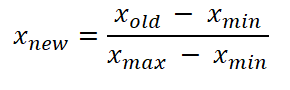

X new = Nilai setelah normalisasi

X old = Nilai asli

X min = Nilai minimum dalam dataset

X max = Nilai maximum dalam dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[1], [5], [10], [15], [20]])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print("Original Data:")
print(data.flatten())
print("Scaled Data (0-1):")
print(scaled_data.flatten())

Original Data:
[ 1  5 10 15 20]
Scaled Data (0-1):
[0.         0.21052632 0.47368421 0.73684211 1.        ]


## **2.2  Z-Score Scaling**

Z-score normalization, yang juga dikenal sebagai standardization, merupakan teknik data preprocessing yang digunakan untuk mengubah data menjadi distribusi normal standar, yang memastikan bahwa semua fitur berada pada skala yang sama. Proses ini membantu menghindari dominasi fitur tertentu atas fitur lainnya karena perbedaan skalanya. Teknik ini mengubah data sehingga memiliki nilai rata-rata 0 dan deviasi standar 1.


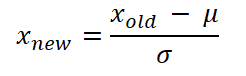

X new = Nilai hasil setelah transformasi (Z-score)

X old = Nilai asli (data mentah)

μ (mu) = Mean (rata-rata dari seluruh data)

σ (sigma) = Standard deviation (simpangan baku dari seluruh data)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.array([[1], [5], [10], [15], [20]])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Original Data:")
print(data.flatten())
print("Scaled Data (Z-Score):")
print(scaled_data.flatten())

Original Data:
[ 1  5 10 15 20]
Scaled Data (Z-Score):
[-1.35411306 -0.76536825 -0.02943724  0.70649377  1.44242478]


## **2.3  Decimal  Scaling**

Decimal scaling adalah metode di mana titik desimal dari angka digeser untuk menormalkan data. Ini dilakukan dengan membagi setiap nilai dengan 10^j, di mana j adalah bilangan bulat terkecil sehingga nilai absolut maksimum dari data yang dinormalisasi kurang dari 1. Metode ini cocok untuk data numerik yang memiliki banyak angka desimal.

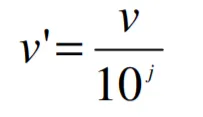

v' = Nilai setelah normalisasi

v = Nilai asli

j = Jumlah digit terbesar dari nilai absolut pada dataset

In [ ]:
import numpy as np

# Data asli
data = np.array([[1], [5], [10], [15], [20]])

# Menentukan nilai j (jumlah digit maksimum)
j = len(str(abs(int(data.max()))))  # Jumlah digit dari nilai maksimum

scaled_data = data / (10 ** j)

print("Data Asli:", data.flatten())
print(f"Data Skala Desimal (dibagi dengan 10^{j}):", scaled_data.flatten())

Data Asli: [ 1  5 10 15 20]
Data Skala Desimal (dibagi dengan 10^2): [0.01 0.05 0.1  0.15 0.2 ]


# **3. Dimensionality Reduction**

Dimensionality reduction adalah proses mengurangi jumlah fitur (atau dimensi) dalam dataset sambil mempertahankan informasi sebanyak mungkin. Hal ini dapat dilakukan karena berbagai alasan, seperti untuk mengurangi kompleksitas model untuk meningkatkan kinerja algoritma atau mempermudah visualisasi data. Terdapat dua komponen dari dimensionality reduction, yaitu feature selection dan feature extraction.

## **3.1  Feature Selection**

Feature selection adalah proses memilih subset fitur dari fitur asli yang masih relevan hingga ruang fitur dikurangi secara optimal menurut kriteria tertentu. Beberapa teknik feature selection yang dapat dilakukan adalah:

a. Filter

Dalam komputasi, metode ini sangat cepat dan ringan dan bekerja dengan baik untuk menghilangkan fitur-fitur yang terduplikasi, berkorelasi, dan redundant, tetapi tidak dapat menghilangkan multikolinearitas. Fitur dengan menganalisis fitur secara independen terhadap target variabel, tanpa melibatkan algoritma machine learning secara langsung. Metode ini menggunakan pengujian statistik atau pengukuran tertentu untuk menentukan relevansi fitur.

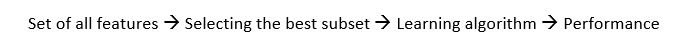

b. Wrapper

Metode wrapper, yang juga seringkali disebut sebagai metode greedy, memerlukan beberapa metode untuk mencari semua kemungkinan subset fitur, menilai kualitasnya dengan mempelajari dan mengevaluasi pengklasifikasian dengan subset fitur tersebut. Proses ini mengevaluasi semua kombinasi kemungkinan fitur terhadap kriteria evaluasi dan biasanya menghasilkan akurasi prediktif yang lebih baik daripada metode filter.

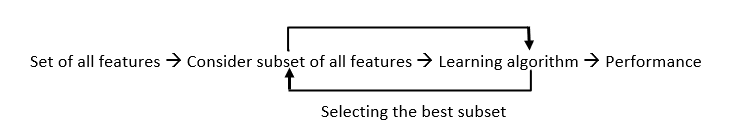

c. Embedding

Metode ini mencakup manfaat dari metode wrapper dan filter dengan menyertakan interaksi fitur, tetapi juga mempertahankan biaya komputasi yang wakar. Metode embedding bersifat iteratif dalam artian menangani setiap iterasi dari proses training model dan mengekstraksi fitur yang paling berkontribusi pada training untuk iterasi tertentu.

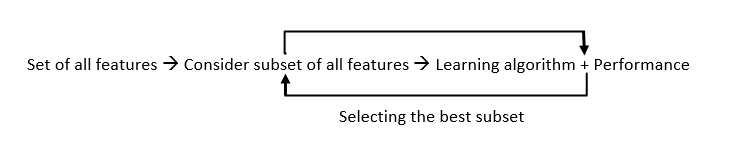

**Perbandingan model:**

| Metode | Kriteria Evaluasi | Kelebihan | Kekurangan |
|---|---|---|---|
| Filter | Korelasi/statistik independen | Cepat, mudah diterapkan | Tidak mempertimbangkan interaksi fitur |
| Wrapper | Evaluasi dengan algoritma model | Mempertimbangkan interaksi fitur | Mahal secara komputasi |
| Embedded | Pemilihan selama training model | Terintegrasi dan efisien | Bergantung pada model |




## **3.2  Feature Extraction**

Feature selection adalah proses memilih subset fitur dari fitur asli yang masih relevan hingga ruang fitur dikurangi secara optimal menurut kriteria tertentu. Beberapa teknik feature selection yang dapat dilakukan adalah:

Feature extraction adalah teknik machine learning yang mengurangi jumlah sumber daya yang dibutuhkan untuk pemrosesan sambil tetap mempertahankan informasi yang signifikan atau relevan. Dengan kata lain, feature extraction memerlukan pembuatan fitur baru yang mempertahankan informasi utama dari data aski, tetapi dengan cara yang lebih efisien dengan mengubah data mentah menjadi serangkaian fitur numerik yang dapat dipahami dan digunakan.

**a. Principal Component Analysis (PCA)**

PCA adalah metode pengurangan dimensi yang sering digunakan untuk menyederhanakan data yang memiliki banyak variabel (berdimensi tinggi) menjadi lebih sedikit (berdimensi rendah). Tujuan utamanya adalah menemukan pola dalam data dan memadatkannya tanpa terlalu banyak kehilangan informasi. PCA bekerja dengan mencari "komponen utama" (principal components), yaitu kombinasi baru dari variabel awal, yang menjelaskan sebanyak mungkin variasi dalam data. PCA adalah metode unsupervised, sehingga tidak mempertimbangkan label atau kategori data.

**b. Linear Discriminant Analysis (LDA )**

LDA adalah metode pengurangan dimensi yang digunakan ketika data sudah memiliki label kelas (supervised). Tujuan LDA adalah menemukan kombinasi linier dari fitur yang memisahkan kelas-kelas dalam data dengan sebaik mungkin.
LDA berfokus pada dua hal:

- Memaksimalkan jarak antar kelas (agar kelas-kelas terlihat terpisah).
- Meminimalkan variasi dalam kelas (agar data dari setiap kelas lebih rapat).

LDA dirancang untuk membantu klasifikasi, sehingga lebih cocok digunakan dalam tugas supervised learning.

**c. t-Distributed Stochastic Neighbor Embedding (t-SNE)**

t-SNE adalah teknik pengurangan dimensi non-linier yang dirancang untuk membantu memahami data berdimensi tinggi. Tujuan utama t-SNE adalah mempertahankan struktur lokal data, sehingga data yang mirip akan tetap berdekatan setelah pengurangan dimensi.
Biasanya, t-SNE mengubah data dari dimensi tinggi (misalnya, 100 atau lebih variabel) menjadi ruang 2D atau 3D, sehingga dapat divisualisasikan dengan mudah menggunakan scatter plot. t-SNE bekerja dengan sangat baik pada kumpulan data yang memiliki pola atau struktur rumit, seperti gambar, suara, atau teks.


# **4. Data Splitting**

Data splitting merupakan proses penting dalam pembelajaran mesin, yang melibatkan pemisahan dataset menjadi beberapa subset, seperti set train, validation, dan test. Hal ini penting untuk melatih model, menyetel parameter, dan pada akhirnya menilai kinerjanya. Tujuan dari pembagian ini adalah memastikan bahwa model tidak hanya mampu "mengingat" data pelatihan tetapi juga dapat membuat prediksi yang akurat pada data baru (generalization).

## **4.1  Train**

Data ini digunakan untuk melatih (training) model. Model belajar pola dan hubungan antara input dan output dari data ini. Biasanya bagian terbesar dari dataset (sekitar 60-80%) diberikan untuk training agar model dapat belajar dengan efektif. Model mencoba meminimalkan error dengan menyesuaikan bobot dalam algoritma selama pelatihan.

## **4.2  Validation**

Dataset ini digunakan untuk mengevaluasi kinerja model selama training tanpa mempengaruhi model secara langsung. Dalam proses ini, dataset dapat membantu menyetel hyperparameter seperti learning rate, jumlah epochs, atau ukuran batch. Selain itu, data validation dapat mendeteksi overfitting, yang ditandai ketika model bekerja sangat baik pada data training tetapi gagal menangkap pola umum sehingga berkinerja buruk pada data baru atau data test. Biasanya sekitar 10-20% dari total data akan dialokasikan untuk data validation. Validation set tidak dipakai untuk pelatihan langsung.

## **4.3  Test**

Dataset ini digunakan untuk menguji model setelah selesai dilatih dan divalidasi. Ini memberikan gambaran tentang kinerja model di dunia nyata. Tujuan dari adanya data test ini adalah untuk menilai generalisasi model, mengevaluasi metrik akhir seperti akurasi, presisi, recall, F1-score, atau mean squared error (MSE), tergantung pada jenis masalah. Biasanya sekitar 10-20% dari total data akan dialokasikan untuk data test. Data ini tidak boleh dilihat oleh model hingga tahap akhir.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
path = '/content/drive/MyDrive/MODUL PENGGALIAN DATA/Dataset /Modul 3/Fruit Prices 2020.csv'
df = pd.read_csv(path)

# Split data menjadi train (70%) dan test + validation (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

# Split temp_df menjadi validation (15%) dan test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle=True)

# Cek ukuran hasil split
print(f"Train set: {train_df.shape}")
print(f"Validation set: {val_df.shape}")
print(f"Test set: {test_df.shape}")

Train set: (43, 8)
Validation set: (9, 8)
Test set: (10, 8)


# **CODELAB**

Pada latihan kali ini, kalian akan melakukan serangkaian langkah pemrosesan data yang meliputi eksplorasi data (EDA), penanganan nilai yang hilang, encoding variabel kategorikal, serta standarisasi data numerik.

[Dataset Codelab](https://drive.google.com/file/d/1Cz_IgTFfkPRhx-rZD2GIrH36t5OI2ikK/view?usp=drive_link)


1. Import library dan data yang diperlukan. Dataset yang digunakan adalah dataset codelab.
2. Tampilkan seluruh nilai dari dataset.
3. Lakukan Explanatory Data Analysis secukupnya.
4. Periksa apakah ada missing value pada dataset.
5. Lakukan encoding pada kolom 'Kelamin'. Pilihlah jenis encoding yang paling cocok.
6. Lakukan data normalisasi pada kolom 'Usia' dan 'EstimasiGaji'. Pilihlah metode yang paling cocok.
7. Urutkan data berdasarkan 'EstimasiGaji' secara ascending.
8. Simpan dataset yang telah melalui pre-processing ke dalam file baru dengan nama 'iklan_sosmed_cleaned.csv'

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/MyDrive/PENGGALIAN_DATA/codelab3.csv')

In [27]:
print("Dataset lengkap:")
df

Dataset lengkap:


,UserID,Kelamin,Usia,EstimasiGaji,Beli
0,15624510,Laki,19,19000,0
1,15810944,Laki,35,20000,0
2,15668575,Perempuan,26,43000,0
3,15603246,Perempuan,27,57000,0
4,15804002,Laki,19,76000,0
...,...,...,...,...,...
395,15691863,Perempuan,46,41000,1
396,15706071,Laki,51,23000,1
397,15654296,Perempuan,50,20000,1
398,15755018,Laki,36,33000,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserID        400 non-null    int64 
 1   Kelamin       400 non-null    object
 2   Usia          400 non-null    int64 
 3   EstimasiGaji  400 non-null    int64 
 4   Beli          400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [29]:
numerical_df = df.drop('UserID', axis=1)
numerical_df.describe()

,Usia,EstimasiGaji,Beli
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [30]:
print(df['Beli'].value_counts())

Beli
0    257
1    143
Name: count, dtype: int64


In [31]:
df.isnull().sum()

,0
UserID,0
Kelamin,0
Usia,0
EstimasiGaji,0
Beli,0


In [32]:
le = LabelEncoder()
df['Kelamin_Encoded'] = le.fit_transform(df['Kelamin'])
print("\nData setelah encoding 'Kelamin':")
df[['Kelamin', 'Kelamin_Encoded']].head()


Data setelah encoding 'Kelamin':


,Kelamin,Kelamin_Encoded
0,Laki,0
1,Laki,0
2,Perempuan,1
3,Perempuan,1
4,Laki,0


In [34]:
scaler = MinMaxScaler()
df[['Usia_Normalized', 'EstimasiGaji_Normalized']] = scaler.fit_transform(
    df[['Usia', 'EstimasiGaji']]
)
print("\nData setelah normalisasi:")
df[['Usia', 'Usia_Normalized', 'EstimasiGaji', 'EstimasiGaji_Normalized']].head()


Data setelah normalisasi:


,Usia,Usia_Normalized,EstimasiGaji,EstimasiGaji_Normalized
0,19,0.023810,19000,0.029630
1,35,0.404762,20000,0.037037
2,26,0.190476,43000,0.207407
3,27,0.214286,57000,0.311111
4,19,0.023810,76000,0.451852


In [35]:
df_sorted = df.sort_values('EstimasiGaji')
print("\nData setelah sorting berdasarkan EstimasiGaji:")
df_sorted.head()


Data setelah sorting berdasarkan EstimasiGaji:


,UserID,Kelamin,Usia,EstimasiGaji,Beli,Kelamin_Encoded,Usia_Normalized,EstimasiGaji_Normalized
43,15792008,Laki,30,15000,0,0,0.285714,0.000000
92,15809823,Laki,26,15000,0,0,0.190476,0.000000
155,15610140,Perempuan,31,15000,0,1,0.309524,0.000000
150,15679651,Perempuan,26,15000,0,1,0.190476,0.000000
180,15685576,Laki,26,16000,0,0,0.190476,0.007407


In [37]:
cleaned_data = df_sorted[['UserID', 'Kelamin_Encoded', 'Usia_Normalized',
                          'EstimasiGaji_Normalized', 'Beli']]
cleaned_data.to_csv('/content/drive/MyDrive/PENGGALIAN_DATA/iklan_sosmed_cleaned.csv', index=False)

In [39]:
cleaned_data

,UserID,Kelamin_Encoded,Usia_Normalized,EstimasiGaji_Normalized,Beli
43,15792008,0,0.285714,0.000000,0
92,15809823,0,0.190476,0.000000,0
155,15610140,1,0.309524,0.000000,0
150,15679651,1,0.190476,0.000000,0
180,15685576,0,0.190476,0.007407,0
...,...,...,...,...,...
168,15789815,0,0.261905,0.985185,1
240,15701537,0,0.571429,0.992593,1
103,15675949,1,0.357143,0.992593,1
211,15735878,0,0.809524,1.000000,1


# **TUGAS**

**NIM GANJIL**

[Dataset Tugas Ganjil](https://drive.google.com/file/d/1_R04HhVyaB9BILBiKi_EsL6_esv_C9Im/view?usp=drive_link)

Gunakan dataset di atas untuk melakukan serangkaian proses di bawah:

1. Handling Categorical Values:
- Identifikasi kolom-kolom kategorikal dalam dataset.
- Terapkan metode handling categorical value yang cocok pada 3 kolom yang ada dalam dataset (tidak boleh ketiganya metode yang sama, bisa proporsi 2 dan 1).
- Lakukan Binning pada kolom Speed Limit, bagi menjadi tiga kategori: Low (0-30 km/h), Medium (40-60 km/h), High (70+ km/h).
2. Data Normalization:
- Gunakan Min-Max Scaling pada kolom Number of Vehicles.
- Gunakan Z-Score Scaling pada kolom Number of Casualties.
- Gunakan Decimal Scaling pada kolom Longitude dan Latitude.

3. Dimensionality Reduction:
- Lakukan Feature Selection dengan memilih fitur yang memiliki korelasi tinggi terhadap jumlah kecelakaan (Number of Casualties).
- Lakukan Feature Extraction menggunakan PCA (Principal Component Analysis) untuk mereduksi jumlah fitur menjadi 5 fitur utama.
4. Data Splitting
- Bagi dataset menjadi Train (70%), Validation (15%), dan Test (15%).
- Pastikan bahwa distribusi kelas dalam variabel target (Severity) tetap seimbang dalam proses pembagian data.

**NIM GENAP**

[Dataset Tugas Genap](https://drive.google.com/file/d/1x2Xpa5T-ifi1xn-MtKA8HOV7E9Rk0NlJ/view?usp=drive_link)

Gunakan dataset di atas untuk melakukan serangkaian proses di bawah:

1. Handling Categorical Values:
- Identifikasi kolom-kolom kategorikal dalam dataset.
- Terapkan metode handling categorical value yang cocok pada 3 kolom yang ada dalam dataset (tidak boleh ketiganya metode yang sama, bisa proporsi 2 dan 1).
- Lakukan Binning pada kolom age dengan membaginya ke dalam 4 kelompok: "Muda", "Dewasa", "Paruh Baya", dan "Lanjut Usia".

2. Data Normalization:
- Gunakan Min-Max Scaling pada kolom balance.
- Gunakan Z-Score Scaling pada kolom duration.
- Gunakan Decimal Scaling pada kolom campaign.

3. Dimensionality Reduction:
- Lakukan Feature Selection dengan memilih hanya fitur yang memiliki korelasi tinggi terhadap variabel target (y). Gunakan korelasi Pearson atau metode seleksi fitur lain yang sesuai.
- Lakukan Feature Extraction menggunakan PCA (Principal Component Analysis) untuk mereduksi dimensi dataset menjadi hanya 5 fitur utama.

4. Data Splitting:
- Bagi dataset menjadi Train (70%), Validation (15%), dan Test (15%).
- Pastikan bahwa distribusi kelas dalam variabel target (y) tetap seimbang dalam proses pembagian data.

# **KRITERIA & DETAIL PENILAIAN**

| Detail | Bobot Nilai |
|---|---|
| Codelab | 15% |
| Tugas | 35% |
| Pemahaman Materi & Ketepatan Jawaban | 50% |